In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [48]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [ ]:
//*[@id="SIDO_NM0"]

In [37]:
gu_list_raw = driver.find_element_by_xpath('''//*[@id="SIGUNGU_NM0"]''')
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [38]:
gu_list

[<selenium.webdriver.remote.webelement.WebElement (session="754ec68129f1b80da04fabf8d10f8c56", element="134e21ca-fbdf-4aae-956f-4e2bfaeb5d1a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="754ec68129f1b80da04fabf8d10f8c56", element="70254d90-8198-45cf-b162-956ef1cdad22")>,
 <selenium.webdriver.remote.webelement.WebElement (session="754ec68129f1b80da04fabf8d10f8c56", element="ac636c92-6be4-4d64-b8df-a07234400c6d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="754ec68129f1b80da04fabf8d10f8c56", element="e0600dbe-6d5a-449e-915b-1a6ee815b2ce")>,
 <selenium.webdriver.remote.webelement.WebElement (session="754ec68129f1b80da04fabf8d10f8c56", element="e8f55f59-5973-4783-b74c-afe4178ba377")>,
 <selenium.webdriver.remote.webelement.WebElement (session="754ec68129f1b80da04fabf8d10f8c56", element="9ee53103-8aa3-4f84-8a65-13547660c940")>,
 <selenium.webdriver.remote.webelement.WebElement (session="754ec68129f1b80da04fabf8d10f8c56", element="baeff733-7bc3-4edd-b4ae-7b

In [39]:
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [76]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[-1])

In [63]:
xpath = '''//*[@id="searRgSelect"]'''
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [66]:
xpath = '''//*[@id="glopopd_excel"]'''
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [78]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)          ##Download File

A Jupyter Widget

In [79]:
driver.close()

In [2]:
import pandas as pd
from glob import glob

In [19]:
stations_files = glob('../data/지역*.xls')
stations_files

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [25]:
tmp_raw=[]
for file_time in stations_files:
    tmp = pd.read_excel(file_time, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [26]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 41
Data columns (total 10 columns):
지역       485 non-null object
상호       485 non-null object
주소       485 non-null object
상표       485 non-null object
전화번호     485 non-null object
셀프여부     485 non-null object
고급휘발유    485 non-null object
휘발유      485 non-null object
경유       485 non-null object
실내등유     485 non-null object
dtypes: object(10)
memory usage: 41.7+ KB


In [27]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)석산에너지,서울 강북구 삼양로 316 (수유동),현대오일뱅크,02-980-1448,Y,-,1257,1057,950
1,서울특별시,북서울고속주유소,서울 강북구 삼양로 410 (수유동),S-OIL,02-907-5182,Y,-,1257,1057,-
2,서울특별시,수유동주유소,서울 강북구 도봉로 395 (수유동),GS칼텍스,02-902-9470,Y,-,1257,1057,-
3,서울특별시,KH에너지(주)직영 송정주유소,서울 강북구 인수봉로 185 (수유동),SK에너지,02-993-5189,N,-,1257,1057,-
4,서울특별시,에덴주유소,서울 강북구 월계로 195 (번동),SK에너지,02-987-8182,Y,-,1279,1079,-


In [32]:
stations = pd.DataFrame({'Oil_store': station_raw['상호'],
                        '주소':station_raw['주소'],
                       '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표': station_raw['상표']})
stations.head()

,Oil_store,가격,상표,셀프,주소
0,(주)석산에너지,1257,현대오일뱅크,Y,서울 강북구 삼양로 316 (수유동)
1,북서울고속주유소,1257,S-OIL,Y,서울 강북구 삼양로 410 (수유동)
2,수유동주유소,1257,GS칼텍스,Y,서울 강북구 도봉로 395 (수유동)
3,KH에너지(주)직영 송정주유소,1257,SK에너지,N,서울 강북구 인수봉로 185 (수유동)
4,에덴주유소,1279,SK에너지,Y,서울 강북구 월계로 195 (번동)


In [35]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]

stations['구'].unique()

array(['강북구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '강서구', '은평구', '종로구', '중구', '중랑구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동대문구', '강남구'], dtype=object)

In [37]:
stations[stations['구']=='강북구']

,Oil_store,가격,상표,셀프,주소,구
0,(주)석산에너지,1257,현대오일뱅크,Y,서울 강북구 삼양로 316 (수유동),강북구
1,북서울고속주유소,1257,S-OIL,Y,서울 강북구 삼양로 410 (수유동),강북구
2,수유동주유소,1257,GS칼텍스,Y,서울 강북구 도봉로 395 (수유동),강북구
3,KH에너지(주)직영 송정주유소,1257,SK에너지,N,서울 강북구 인수봉로 185 (수유동),강북구
4,에덴주유소,1279,SK에너지,Y,서울 강북구 월계로 195 (번동),강북구
5,SK네트웍스(주) 새한주유소,1289,SK에너지,Y,서울 강북구 도봉로 75,강북구
6,㈜지에스이앤알 미아주유소,1289,GS칼텍스,Y,서울 강북구 도봉로 122 (미아동),강북구
7,현대오일뱅크(주)직영 번동셀프주유소,1299,현대오일뱅크,Y,서울 강북구 한천로 963 (번동),강북구
8,세원주유소,1299,SK에너지,Y,서울 강북구 한천로 918 (번동),강북구
9,현대오일뱅크(주)직영 미아셀프주유소,1299,현대오일뱅크,Y,서울 강북구 도봉로 200 (미아동),강북구


In [40]:
stations[stations['가격']=='-']

,Oil_store,가격,상표,셀프,주소,구
12,서강주유소,-,SK에너지,N,서울 마포구 독막로 134 (창전동),마포구
16,삼융주유소,-,SK에너지,N,서울 은평구 수색로 299 (수색동),은평구
40,삼성주유소,-,SK에너지,N,서울 강남구 삼성로 521 (삼성동),강남구
41,동우주유소,-,SK에너지,N,서울특별시 강남구 봉은사로 311 (논현동),강남구


In [42]:
stations = stations[stations['가격']!='-']
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,(주)석산에너지,1257,현대오일뱅크,Y,서울 강북구 삼양로 316 (수유동),강북구
1,북서울고속주유소,1257,S-OIL,Y,서울 강북구 삼양로 410 (수유동),강북구
2,수유동주유소,1257,GS칼텍스,Y,서울 강북구 도봉로 395 (수유동),강북구
3,KH에너지(주)직영 송정주유소,1257,SK에너지,N,서울 강북구 인수봉로 185 (수유동),강북구
4,에덴주유소,1279,SK에너지,Y,서울 강북구 월계로 195 (번동),강북구


In [44]:
stations['가격'] = [float(value) for value in stations['가격']]

In [48]:
stations.reset_index(inplace = True)
del stations['index']
del stations['level_0']

In [49]:
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,(주)석산에너지,1257.0,현대오일뱅크,Y,서울 강북구 삼양로 316 (수유동),강북구
1,북서울고속주유소,1257.0,S-OIL,Y,서울 강북구 삼양로 410 (수유동),강북구
2,수유동주유소,1257.0,GS칼텍스,Y,서울 강북구 도봉로 395 (수유동),강북구
3,KH에너지(주)직영 송정주유소,1257.0,SK에너지,N,서울 강북구 인수봉로 185 (수유동),강북구
4,에덴주유소,1279.0,SK에너지,Y,서울 강북구 월계로 195 (번동),강북구


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

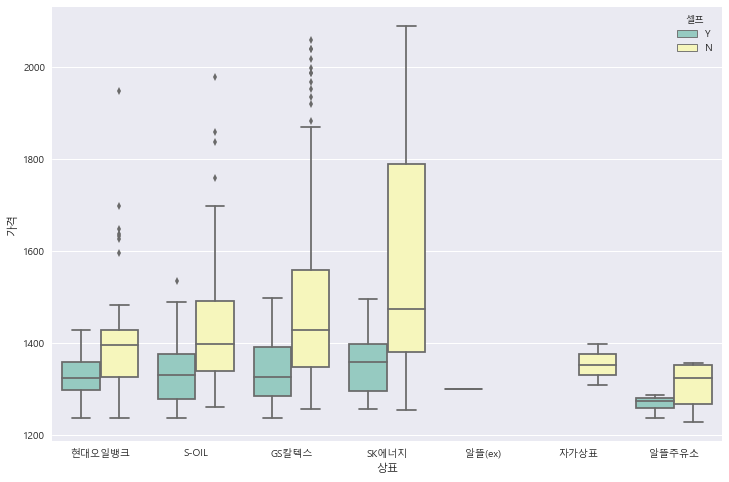

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

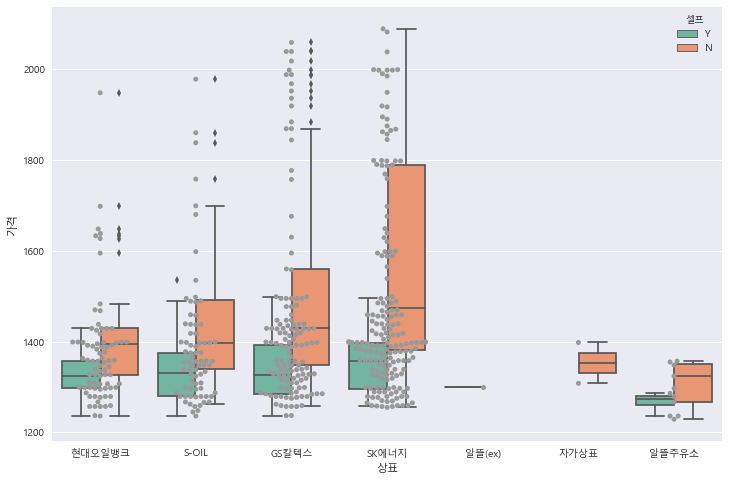

In [69]:
plt.figure(figsize = (12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data = stations, palette = 'Set2')
sns.swarmplot(x='상표', y='가격', data = stations, color = '.6')
plt.show()

In [71]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [78]:
stations.sort_values(by='가격', ascending= False).head(10)

,Oil_store,가격,상표,셀프,주소,구
302,서남주유소,2089.0,SK에너지,N,서울 중구 통일로 30,중구
480,뉴서울(강남),2082.0,SK에너지,N,서울 강남구 언주로 716 (논현동),강남구
231,서계주유소,2059.0,GS칼텍스,N,서울 용산구 청파로 367 (서계동),용산구
301,필동주유소,2039.0,GS칼텍스,N,서울 중구 퇴계로 196 (필동2가),중구
300,에스씨(주) 역전주유소,2039.0,GS칼텍스,N,서울 중구 퇴계로 15,중구
299,장충주유소,2038.0,SK에너지,N,서울 중구 장충단로 202 (장충동1가),중구
230,수림석유 제3한강주유소,2018.0,GS칼텍스,N,서울 용산구 한남대로 45 (한남동),용산구
298,SK에너지(주) 퇴계로주유소,1999.0,SK에너지,N,서울 중구 퇴계로 228 (필동2가),중구
229,갈월동주유소,1999.0,SK에너지,N,서울 용산구 한강대로 322 (갈월동),용산구
227,에너비스,1998.0,SK에너지,N,서울 용산구 한남대로 82 (한남동),용산구


In [79]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,가격,상표,셀프,주소,구
103,원천주유소,1229.0,알뜰주유소,N,서울 성북구 돌곶이로 142 (장위동),성북구
160,현대주유소,1236.0,S-OIL,Y,서울 양천구 남부순환로 372 (신월동),양천구
161,형산석유(주)원주유소,1236.0,현대오일뱅크,N,서울 양천구 남부순환로 408,양천구
232,뉴신정주유소,1236.0,알뜰주유소,N,서울 강서구 곰달래로 207(화곡동),강서구
233,화곡역주유소,1236.0,알뜰주유소,Y,서울특별시 강서구 강서로 154 (화곡동),강서구
105,이케이에너지㈜ 강산주유소,1237.0,GS칼텍스,Y,서울 성북구 보문로 27 (보문동7가),성북구
106,강산제2주유소,1237.0,현대오일뱅크,Y,서울 성북구 보국문로 52,성북구
104,(주)삼표에너지 정릉주유소,1237.0,GS칼텍스,Y,서울 성북구 보국문로 35 (정릉동),성북구
107,(주)신용 구도일주유소화랑로,1245.0,S-OIL,Y,서울 성북구 화랑로 174,성북구
303,구도일주유소 한인,1248.0,S-OIL,Y,서울 중랑구 망우로 170 (상봉동),중랑구


In [87]:
import numpy as np

gu_data = pd.pivot_table(stations, index=['구'], values=['가격'],
                        aggfunc = np.mean)
gu_data.head()

,가격
구,
강남구,1595.975000
강북구,1286.076923
강서구,1360.294118
관악구,1425.750000
광진구,1348.705882


In [88]:
gu_data.sort_values(by='가격', ascending=False).head()

,가격
구,
용산구,1870.928571
중구,1863.000000
종로구,1702.000000
강남구,1595.975000
마포구,1540.750000


In [91]:
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start = 10.5,
                tiles = 'Stamen Toner')
map.choropleth(geo_data = geo_str,
              data = gu_data,
              columns = [gu_data.index, '가격'],
              fill_color='PuRd',
              key_on='feature.id')
map

In [97]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,가격,상표,셀프,주소,구
302,서남주유소,2089.0,SK에너지,N,서울 중구 통일로 30,중구
480,뉴서울(강남),2082.0,SK에너지,N,서울 강남구 언주로 716 (논현동),강남구
231,서계주유소,2059.0,GS칼텍스,N,서울 용산구 청파로 367 (서계동),용산구
301,필동주유소,2039.0,GS칼텍스,N,서울 중구 퇴계로 196 (필동2가),중구
300,에스씨(주) 역전주유소,2039.0,GS칼텍스,N,서울 중구 퇴계로 15,중구
299,장충주유소,2038.0,SK에너지,N,서울 중구 장충단로 202 (장충동1가),중구
230,수림석유 제3한강주유소,2018.0,GS칼텍스,N,서울 용산구 한남대로 45 (한남동),용산구
298,SK에너지(주) 퇴계로주유소,1999.0,SK에너지,N,서울 중구 퇴계로 228 (필동2가),중구
229,갈월동주유소,1999.0,SK에너지,N,서울 용산구 한강대로 322 (갈월동),용산구
227,에너비스,1998.0,SK에너지,N,서울 용산구 한남대로 82 (한남동),용산구


In [96]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,가격,상표,셀프,주소,구
103,원천주유소,1229.0,알뜰주유소,N,서울 성북구 돌곶이로 142 (장위동),성북구
160,현대주유소,1236.0,S-OIL,Y,서울 양천구 남부순환로 372 (신월동),양천구
161,형산석유(주)원주유소,1236.0,현대오일뱅크,N,서울 양천구 남부순환로 408,양천구
232,뉴신정주유소,1236.0,알뜰주유소,N,서울 강서구 곰달래로 207(화곡동),강서구
233,화곡역주유소,1236.0,알뜰주유소,Y,서울특별시 강서구 강서로 154 (화곡동),강서구
105,이케이에너지㈜ 강산주유소,1237.0,GS칼텍스,Y,서울 성북구 보문로 27 (보문동7가),성북구
106,강산제2주유소,1237.0,현대오일뱅크,Y,서울 성북구 보국문로 52,성북구
104,(주)삼표에너지 정릉주유소,1237.0,GS칼텍스,Y,서울 성북구 보국문로 35 (정릉동),성북구
107,(주)신용 구도일주유소화랑로,1245.0,S-OIL,Y,서울 성북구 화랑로 174,성북구
303,구도일주유소 한인,1248.0,S-OIL,Y,서울 중랑구 망우로 170 (상봉동),중랑구


In [94]:
gmaps_key = "*********************************"
gmaps = googlemaps.Client(key=gmaps_key)

In [101]:

from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

A Jupyter Widget

,Oil_store,가격,상표,셀프,주소,구,lat,lng
302,서남주유소,2089.0,SK에너지,N,서울 중구 통일로 30,중구,37.558348,126.972090
480,뉴서울(강남),2082.0,SK에너지,N,서울 강남구 언주로 716 (논현동),강남구,37.517636,127.035756
231,서계주유소,2059.0,GS칼텍스,N,서울 용산구 청파로 367 (서계동),용산구,37.552290,126.968935
301,필동주유소,2039.0,GS칼텍스,N,서울 중구 퇴계로 196 (필동2가),중구,37.560850,126.993653
300,에스씨(주) 역전주유소,2039.0,GS칼텍스,N,서울 중구 퇴계로 15,중구,37.557001,126.974495
299,장충주유소,2038.0,SK에너지,N,서울 중구 장충단로 202 (장충동1가),중구,37.562719,127.007010
230,수림석유 제3한강주유소,2018.0,GS칼텍스,N,서울 용산구 한남대로 45 (한남동),용산구,37.532731,127.007481
298,SK에너지(주) 퇴계로주유소,1999.0,SK에너지,N,서울 중구 퇴계로 228 (필동2가),중구,37.561648,126.997142
229,갈월동주유소,1999.0,SK에너지,N,서울 용산구 한강대로 322 (갈월동),용산구,37.546955,126.972218
227,에너비스,1998.0,SK에너지,N,서울 용산구 한남대로 82 (한남동),용산구,37.535952,127.006130


In [116]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
    
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

A Jupyter Widget

,Oil_store,가격,상표,셀프,주소,구,lat,lng
103,원천주유소,1229.0,알뜰주유소,N,서울 성북구 돌곶이로 142 (장위동),성북구,37.614921,127.052752
160,현대주유소,1236.0,S-OIL,Y,서울 양천구 남부순환로 372 (신월동),양천구,37.533811,126.829240
161,형산석유(주)원주유소,1236.0,현대오일뱅크,N,서울 양천구 남부순환로 408,양천구,37.531003,126.831022
232,뉴신정주유소,1236.0,알뜰주유소,N,서울 강서구 곰달래로 207(화곡동),강서구,37.531554,126.856024
233,화곡역주유소,1236.0,알뜰주유소,Y,서울특별시 강서구 강서로 154 (화곡동),강서구,37.540657,126.841506
105,이케이에너지㈜ 강산주유소,1237.0,GS칼텍스,Y,서울 성북구 보문로 27 (보문동7가),성북구,37.577912,127.022774
106,강산제2주유소,1237.0,현대오일뱅크,Y,서울 성북구 보국문로 52,성북구,37.609163,127.010074
104,(주)삼표에너지 정릉주유소,1237.0,GS칼텍스,Y,서울 성북구 보국문로 35 (정릉동),성북구,37.607660,127.009858
107,(주)신용 구도일주유소화랑로,1245.0,S-OIL,Y,서울 성북구 화랑로 174,성북구,37.606865,127.050070
303,구도일주유소 한인,1248.0,S-OIL,Y,서울 중랑구 망우로 170 (상봉동),중랑구,37.592411,127.071856


In [125]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n],
                             oil_price_top10['lng'][n]],
                           radius = 15, color='#CD3181',
                           fill_color = '#CD3181',
                           fill=True).add_to(map)
        
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]):
        folium.CircleMarker([oil_price_bottom10['lat'][n],
                             oil_price_bottom10['lng'][n]],
                           radius = 15, color='#3186cc',
                           fill_color = '#3186cc',
                           fill=True).add_to(map)

In [127]:
map